参考资料：https://mp.weixin.qq.com/s/llR14JKObuNn_OiuMA1CrQ
下面是常见的参数及解释，详细的请参考官网：https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 随机生成4*3的数据
data = np.random.randn(4, 3)
data

array([[ 1.67066769,  0.05527594,  0.56852262],
       [ 0.37301197, -0.90323694,  1.99702935],
       [-0.09890566, -0.93019061, -0.0551962 ],
       [ 1.34236275,  0.07390355,  0.93402631]])

In [3]:
df = pd.DataFrame(
    data,  # 数据
    columns = ['col1', 'col2', 'col3'],  # 属性
    index=['A', 'B', 'C', 'D']  # 索引
    )
df

,col1,col2,col3
A,1.670668,0.055276,0.568523
B,0.373012,-0.903237,1.997029
C,-0.098906,-0.930191,-0.055196
D,1.342363,0.073904,0.934026


## 1、折线图

<AxesSubplot:>

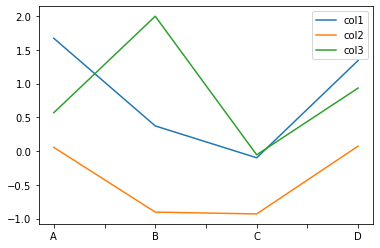

In [5]:
df.plot(kind="line")

<AxesSubplot:xlabel='x_new', ylabel='y_new'>

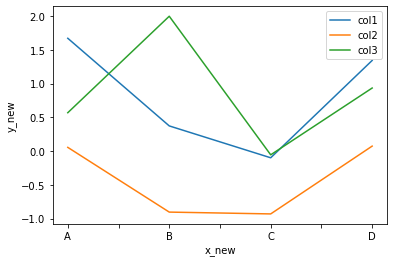

In [7]:
# 设置两个轴的名称

df.plot(kind="line",xlabel="x_new",ylabel="y_new")

## 2、柱状图

<AxesSubplot:title={'center':'use pandas to make bar'}>

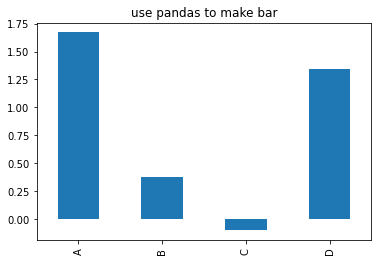

In [8]:
# 写法1
df.col1.plot(kind="bar",title="use pandas to make bar")
# 写法2
df["col1"].plot(kind="bar",title="use pandas to make bar")
# 写法3
df.col1.plot.bar(title="use pandas to make bar")

<AxesSubplot:title={'center':'bar'}>

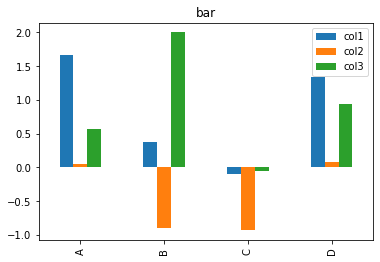

In [10]:
# 多元素柱状图
df.plot(kind='bar', title='bar')

<AxesSubplot:>

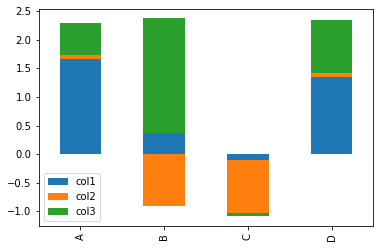

In [11]:
# 堆叠柱状图
df.plot(kind='bar',stacked=True)

<AxesSubplot:>

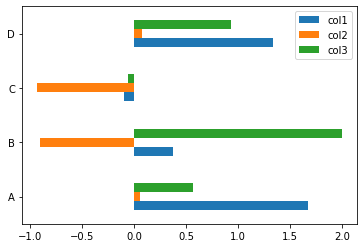

In [12]:
# 水平柱状图
df.plot.barh()

<AxesSubplot:>

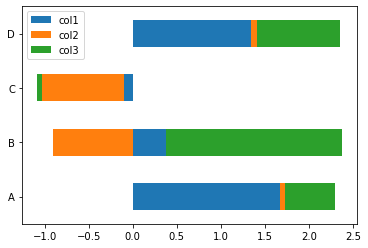

In [13]:
# 水平堆叠柱状图
df.plot.barh(stacked=True)

## 3、散点图

<AxesSubplot:xlabel='col1', ylabel='col3'>

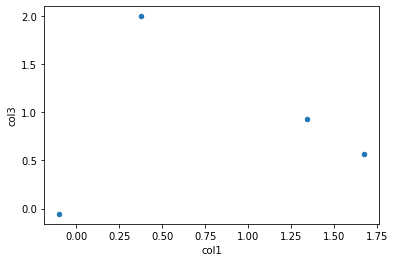

In [14]:
df.plot(kind='scatter', x='col1', y='col3')

<AxesSubplot:xlabel='col1', ylabel='col3'>

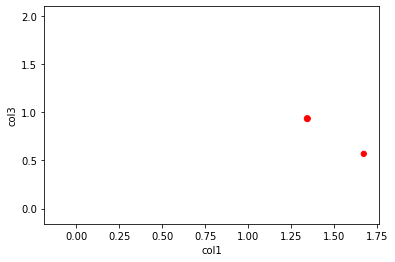

In [16]:
# 改变大小和颜色
df.plot(kind="scatter", # 指定类型
        x="col1", y="col3",  # 指定两个轴
        s=df["col2"] *500,  # 点的大小
        c="r"  # 点的颜色
       )  

<AxesSubplot:xlabel='col1', ylabel='col2'>

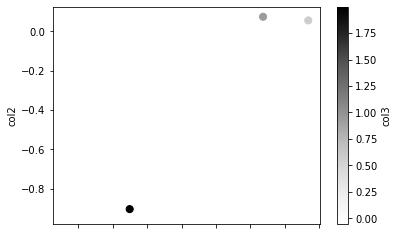

In [17]:
# 带颜色棒的散点图
df.plot.scatter(
x='col1',
y='col2',
c='col3',
s=50)

## 4、饼图

In [19]:
# 模拟新数据
series = pd.Series(np.random.rand(4), index=['a', 'b', 'c', 'd'])
series

a    0.537920
b    0.819643
c    0.671248
d    0.459906
dtype: float64

<AxesSubplot:ylabel='None'>

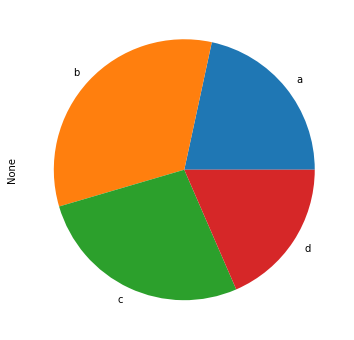

In [20]:
series.plot(kind='pie', figsize=(6, 6))

In [21]:
df2 = pd.DataFrame(
5*np.random.rand(4, 2),
index=['a', 'b', 'c', 'd'],
columns=['x', 'y'])
df

,col1,col2,col3
A,1.670668,0.055276,0.568523
B,0.373012,-0.903237,1.997029
C,-0.098906,-0.930191,-0.055196
D,1.342363,0.073904,0.934026


## 5、箱型图

<AxesSubplot:>

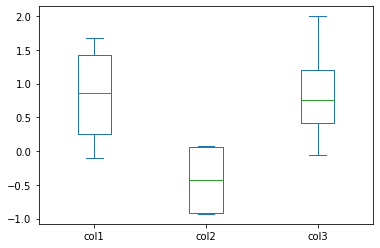

In [22]:
df.plot(kind='box', y=df.columns)

<AxesSubplot:>

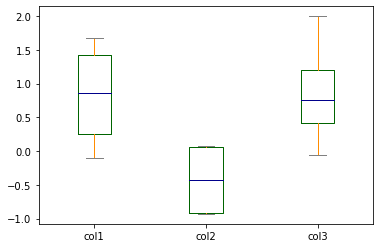

In [23]:
# 自定义箱型图
# 自定义颜色
color = {"boxes": "DarkGreen",
         "whiskers": "DarkOrange",
         "medians": "DarkBlue",
         "caps": "Gray"}

df.plot.box(color=color, sym="r+")

<AxesSubplot:>

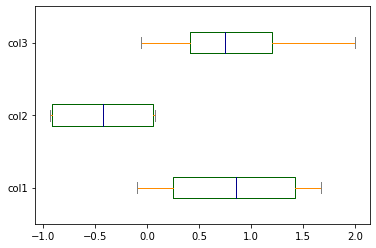

In [24]:
# 水平箱型图
# 自定义颜色
color = {"boxes": "DarkGreen",
         "whiskers": "DarkOrange",
         "medians": "DarkBlue",
         "caps": "Gray"}

df.plot.box(color=color, 
            vert=False,  # 关键参数
            sym="r+")

<AxesSubplot:>

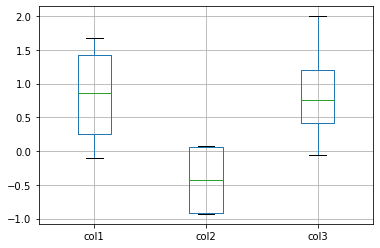

In [25]:
# 使用boxplot绘箱型图
df.boxplot()

<AxesSubplot:>

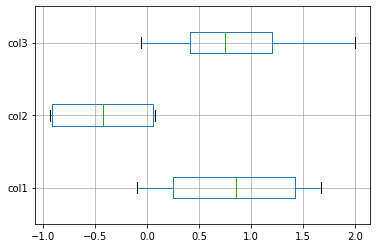

In [26]:
# 使用boxplot绘箱型图
df.boxplot(vert=False)

## 6、蜂窝图

In [28]:
# 模拟数据
df1 = pd.DataFrame(
np.random.randn(10000, 3),
columns=['A', 'B', 'C'])
df1

,A,B,C
0,1.139271,-2.379539,-0.440638
1,-0.198650,0.136967,-0.057769
2,1.081619,1.502179,2.128804
3,-0.359632,-0.124554,-0.122757
4,-0.625368,-2.903438,-1.016098
...,...,...,...
9995,0.811466,0.729609,0.670748
9996,-0.352377,0.153947,-0.681048
9997,0.248321,-1.086833,0.244322
9998,0.796701,0.123804,-0.780627


<AxesSubplot:xlabel='A', ylabel='B'>

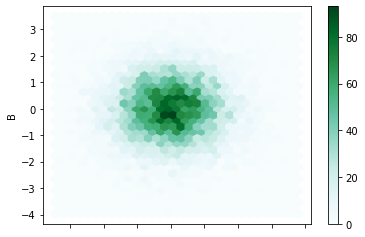

In [29]:
# 基础蜂窝图
df1.plot(kind='hexbin', x='A', y='B', gridsize=30)

<AxesSubplot:xlabel='A', ylabel='B'>

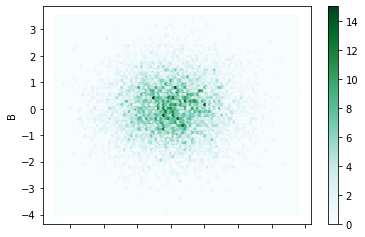

In [30]:
# 基础蜂窝图
df1.plot(kind='hexbin', x='A', y='B', gridsize=100)

<AxesSubplot:xlabel='A', ylabel='B'>

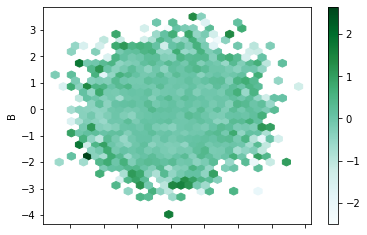

In [31]:
# 改进版蜂窝图
df1.plot(
    kind="hexbin",
    x="A",
    y="B",
    C="C",  # 颜色深度的表示
    reduce_C_function=np.mean, # 指定不同聚合参数：mean/max/min/sum/std
    gridsize=30)

## 7、直方图

<AxesSubplot:ylabel='Frequency'>

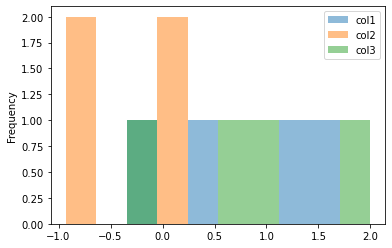

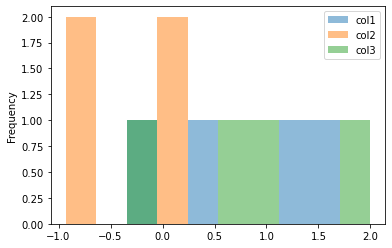

In [32]:
# 写法1
df.plot(kind="hist",alpha=0.5)
# 写法2
df.plot.hist(alpha=0.5)

## 9、密度图

<AxesSubplot:ylabel='Density'>

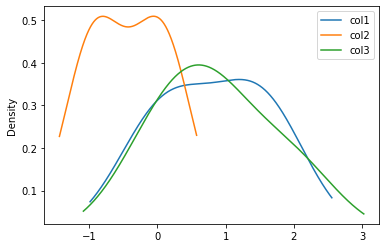

In [33]:
# 针对df
df.plot(kind='kde')

<AxesSubplot:ylabel='Density'>

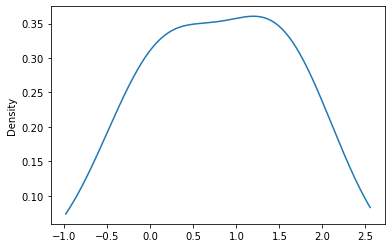

In [34]:
# 针对Series
df['col1'].plot(kind='kde')

## 10、面积图

<AxesSubplot:>

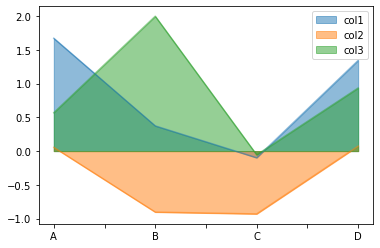

In [35]:
df.plot(kind='area', stacked=False)

## 11、多子图

绘制子图主要的参数：

subplots: 默认False, 如果希望每列绘制子图， 则赋值为True
layout: 子图的布局, 即画布被横竖分为几块, 如:(2,3)表示2行3列
figsize: 整个画布大小

array([[<AxesSubplot:title={'center':'col1'}>,
        <AxesSubplot:title={'center':'col2'}>,
        <AxesSubplot:title={'center':'col3'}>]], dtype=object)

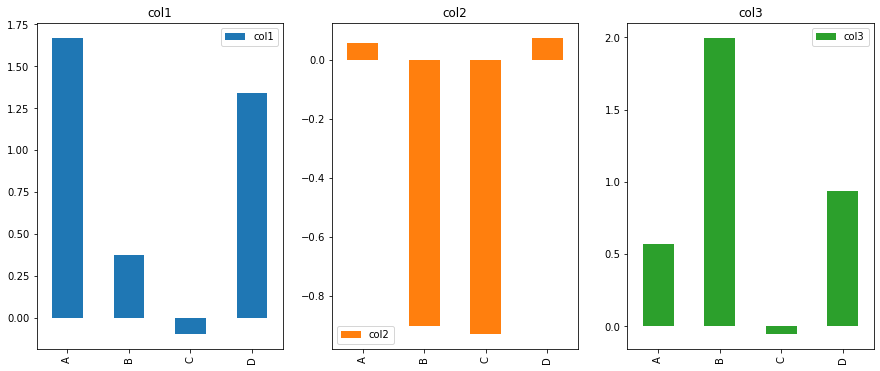

In [36]:
df.plot(subplots=True,
        layout=(1,3),  # 1行3列
        figsize=(15,6),
        kind="bar"
       )

array([[<AxesSubplot:title={'center':'col1'}>,
        <AxesSubplot:title={'center':'col2'}>,
        <AxesSubplot:title={'center':'col3'}>]], dtype=object)

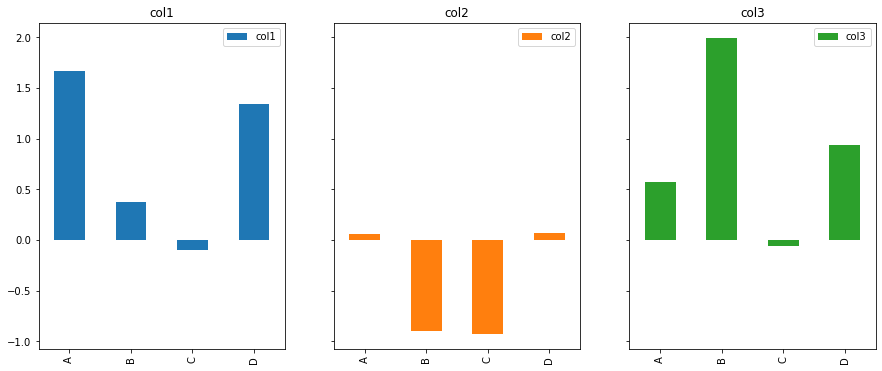

In [37]:
# 共享y轴
df.plot(subplots=True,
        layout=(1,3),  # 1行3列
        figsize=(15,6),
        kind="bar",
        sharey=True  # 开启共享y轴
       )

## 12、散点矩阵图


array([[<AxesSubplot:xlabel='A', ylabel='A'>,
        <AxesSubplot:xlabel='B', ylabel='A'>,
        <AxesSubplot:xlabel='C', ylabel='A'>],
       [<AxesSubplot:xlabel='A', ylabel='B'>,
        <AxesSubplot:xlabel='B', ylabel='B'>,
        <AxesSubplot:xlabel='C', ylabel='B'>],
       [<AxesSubplot:xlabel='A', ylabel='C'>,
        <AxesSubplot:xlabel='B', ylabel='C'>,
        <AxesSubplot:xlabel='C', ylabel='C'>]], dtype=object)

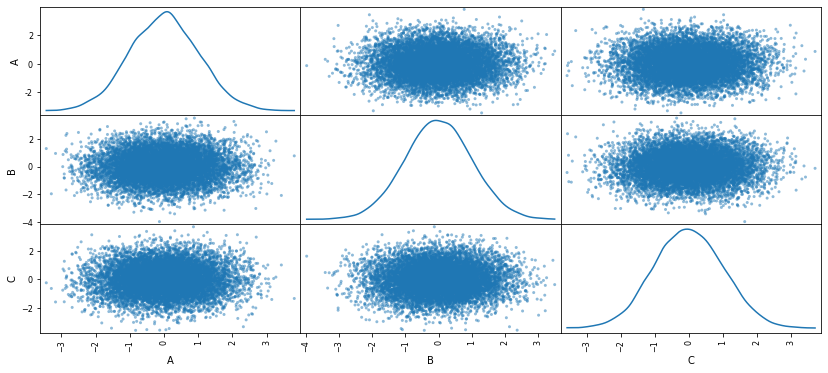

In [38]:
# 单图导入
from pandas.plotting import scatter_matrix

scatter_matrix(df1,alpha=0.5,figsize=(14,6),diagonal="kde")

## 13、平行分类图

<AxesSubplot:>

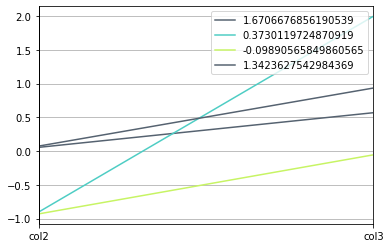

In [41]:
# 导图模块
from pandas.plotting import parallel_coordinates

parallel_coordinates(
    df, # 数据
    class_column="col1",  # 分类名称所用字段
    color=('#556270', '#4ECDC4', '#C7F464') # 颜色设置
)

总结下Pandas内置绘图的特点：

- 代码量少，最大的优点
- 快速简洁，基本绘图可以满足
- 静态化，非动态可视化
- 图片质量一般